<a href="https://colab.research.google.com/github/Namangoyal04/ECG-Signal-Processing/blob/main/ECG_source_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

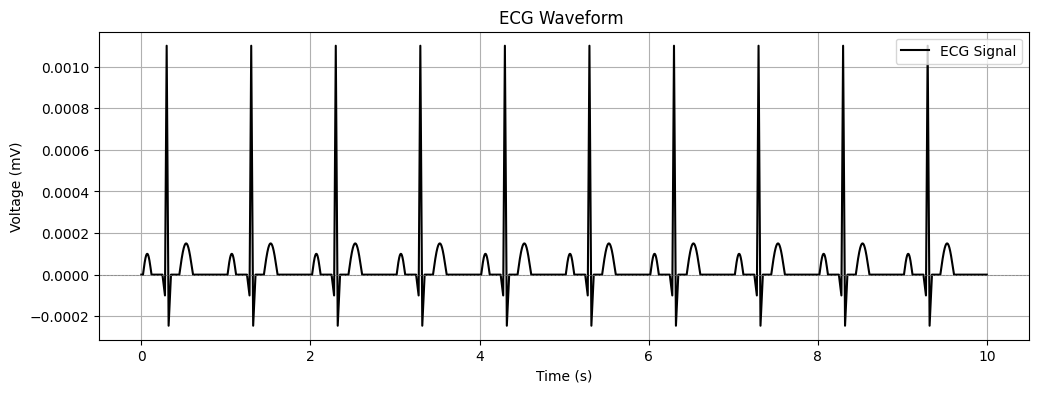

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define time axis
t_single = np.arange(0, 1, 0.001)  # 1 second duration, 1ms resolution

# P-wave (Smooth Sinusoidal)
P_wave = 0.1 * np.sin(2 * np.pi * 5 * (t_single - 0.02)) * (t_single > 0.02) * (t_single < 0.12)

# Q-wave (Triangular) - Ends at 0.28 now
Q_wave = -0.1 * (t_single - 0.25) * (t_single > 0.25) * (t_single <= 0.28) / 0.03

# R_1st-wave (Triangular) - Starts exactly at 0.28

R_1st_wave = (60 * (t_single - 0.28)-0.1) * (t_single > 0.28) * (t_single <= 0.30)

# R_2nd-wave (Triangular) - Starts exactly at 0.30

R_2nd_wave = (-60 * (t_single - 0.30)+1.1) * (t_single > 0.30) * (t_single <= 0.3225)

 # S-wave (Triangular)
S_wave = (9.09* (t_single-0.3225)-0.25) * (t_single > 0.3225) * (t_single < 0.35)

 # T-wave (Smooth Sinusoidal)
T_wave = 0.15 * np.sin(6.25 * np.pi  * (t_single - 0.45)) * (t_single > 0.45) * (t_single < 0.61)

# Combine all ECG components
ECG_single_cycle = (P_wave + Q_wave + R_1st_wave + R_2nd_wave + S_wave + T_wave)/1000

# ---- Repeat ECG for 5 Cycles ----
num_cycles = 10
t = np.tile(t_single, num_cycles) + np.repeat(np.arange(num_cycles), len(t_single))
ECG_signal = np.tile(ECG_single_cycle, num_cycles)
# ---- Plot the  ECG Signal ----
plt.figure(figsize=(12, 4))


plt.plot(t, ECG_signal, label="ECG Signal", color="black", linewidth=1.5)
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)  # Baseline
plt.xlabel("Time (s)")
plt.ylabel("Voltage (mV)")
plt.title("ECG Waveform ")
plt.legend()
plt.grid()
plt.show()

# ---- Save the Noisy ECG Waveform as a Text File ----
data = np.column_stack((t, ECG_signal))  # Combine time and signal
np.savetxt("ecg_waveform.txt", data, fmt="%.6f", delimiter=" ", header="", comments="")



# # Downlfor Google Colab users)
# from google.colab import files
# files.download("ecg_waveform.txt")
